In [1]:
import numpy as np

In [24]:
#  Felzenszwalb et al.
def non_max_suppression_slow(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
 
    # initialize the list of picked indexes
    pick = []
 
    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    w = boxes[:,2]
    h = boxes[:,3]
    x2 = x1 + w
    y2 = y1 + h
 
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (w + 1) * (h + 1)
    idxs = np.argsort(y2)
    
    # keep looping while some indexes still remain in the indexes list
    while len(idxs) > 0:
        # grab the last index in the indexes list, add the index
        # value to the list of picked indexes, then initialize
        # the suppression list (i.e. indexes that will be deleted)
        # using the last index
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        suppress = [last]

In [32]:
# Malisiewicz et al.
def non_max_suppression_fast(boxes, overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
 
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
 
    # initialize the list of picked indexes	
    pick = []
 
    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    w = boxes[:,2]
    h = boxes[:,3]
 
    x2 = x1 + w
    y2 = y1 + h

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (w + 1) * (h + 1)
    idxs = np.argsort(y2)
 
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
 
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
 
        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
 
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
 
        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))
 
    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int")

In [43]:
boxes = np.array([[2, 2, 1, 2],
    [2, 2, 1, 2],
    [5, 7, 3, 5],
    [2, 2, 1, 1],
    [25, 27, 16, 24],
    [9, 11, 6, 8],
    [2, 3, 1, 2],
    [4, 5, 2, 3],
    [13, 15, 8, 12],
    [6, 8, 4, 5],
    [18, 20, 12, 17]])

In [50]:
foo = non_max_suppression_fast(boxes, 0.2)

In [51]:
print("Boxes:",boxes.shape)
print("Filtered:",foo.shape)

Boxes: (11, 4)
Filtered: (5, 4)


In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

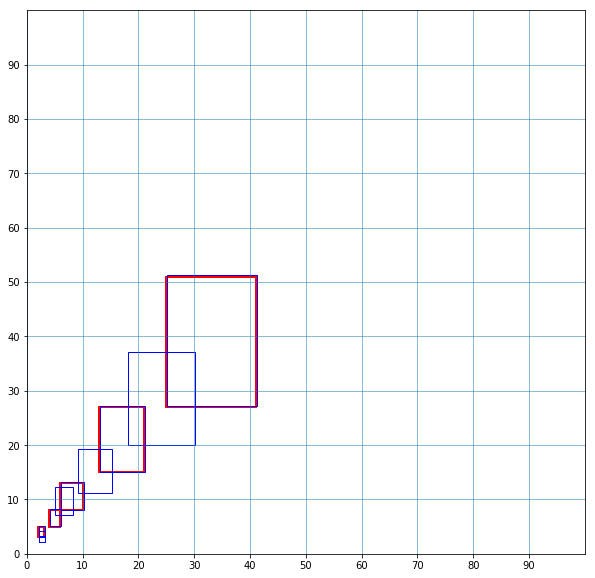

In [52]:
coords = np.arange(0, 100, 10)

fig,ax = plt.subplots(1, figsize=(10,10))

for box in foo:
    x, y, w, h = box
    rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

for box in boxes:   
    box = box + 0.1
    x, y, w, h = box
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

plt.xticks(coords)
plt.yticks(coords)
for item in coords:
    plt.axvline(item, linewidth=0.5)
    plt.axhline(item, linewidth=0.5)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [31]:
overlapThresh = 0.3

# initialize the list of picked indexes
pick = []

# grab the coordinates of the bounding boxes
x1 = boxes[:,0]
y1 = boxes[:,1]
w = boxes[:,2]
h = boxes[:,3]
x2 = x1 + w
y2 = y1 + h

# compute the area of the bounding boxes and sort the bounding
# boxes by the bottom-right y-coordinate of the bounding box
area = (w + 1) * (h + 1)
idxs = np.argsort(y2)
print("idxs:", idxs)

# keep looping while some indexes still remain in the indexes list
while len(idxs) > 0:
    # grab the last index in the indexes list, add the index
    # value to the list of picked indexes, then initialize
    # the suppression list (i.e. indexes that will be deleted)
    # using the last index
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)
    suppress = [last]
    
    # loop over all indexes in the indexes list
    for pos in range(0, last):
        # grab the current index
        j = idxs[pos]

        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = max(x1[i], x1[j])
        yy1 = max(y1[i], y1[j])
        xx2 = min(x2[i], x2[j])
        yy2 = min(y2[i], y2[j])

        # compute the width and height of the bounding box
        w = max(0, xx2 - xx1 + 1)
        h = max(0, yy2 - yy1 + 1)

        # compute the ratio of overlap between the computed
        # bounding box and the bounding box in the area list
        overlap = float(w * h) / area[j]
        print("overlap:", overlap)
        # if there is sufficient overlap, suppress the
        # current bounding box
        if overlap > overlapThresh:
            suppress.append(pos)
    
    print("Suppress:", suppress)
    # delete all indexes from the index list that are in the
    # suppression list
    idxs = np.delete(idxs, suppress)

# return only the bounding boxes that were picked
print("Boxes:", boxes[pick])

idxs: [ 3  0  1  6  7  2  9  5  8 10  4]
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.28205128205128205
Suppress: [10]
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.27350427350427353
Suppress: [9]
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.23809523809523808
Suppress: [8]
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.2
Suppress: [7]
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.08333333333333333
overlap: 0.625
Suppress: [6, 5]
overlap: 0.0
overlap: 0.0
overlap: 0.0
overlap: 0.0
Suppress: [4]
overlap: 0.5
overlap: 0.6666666666666666
overlap: 0.6666666666666666
Suppress: [3, 0, 1, 2]
Boxes: [[25 27 16 24]
 [18 20 12 17]
 [13 15  8 12]
 [ 9 11  6  8]
 [ 6  8  4  5]
 [ 4  5  2  3]
 [ 2  3  1  2]]


In [18]:
pick

[4, 10, 8, 5, 9, 2, 7, 6, 1, 0, 3]

In [4]:
boxes = [1 1 0 1]

SyntaxError: invalid syntax (<ipython-input-4-cfd2ba611963>, line 1)